In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300
%matplotlib inline

In [15]:
df = pd.read_csv('Zoo.csv')

In [16]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [17]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [18]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

<Axes: >

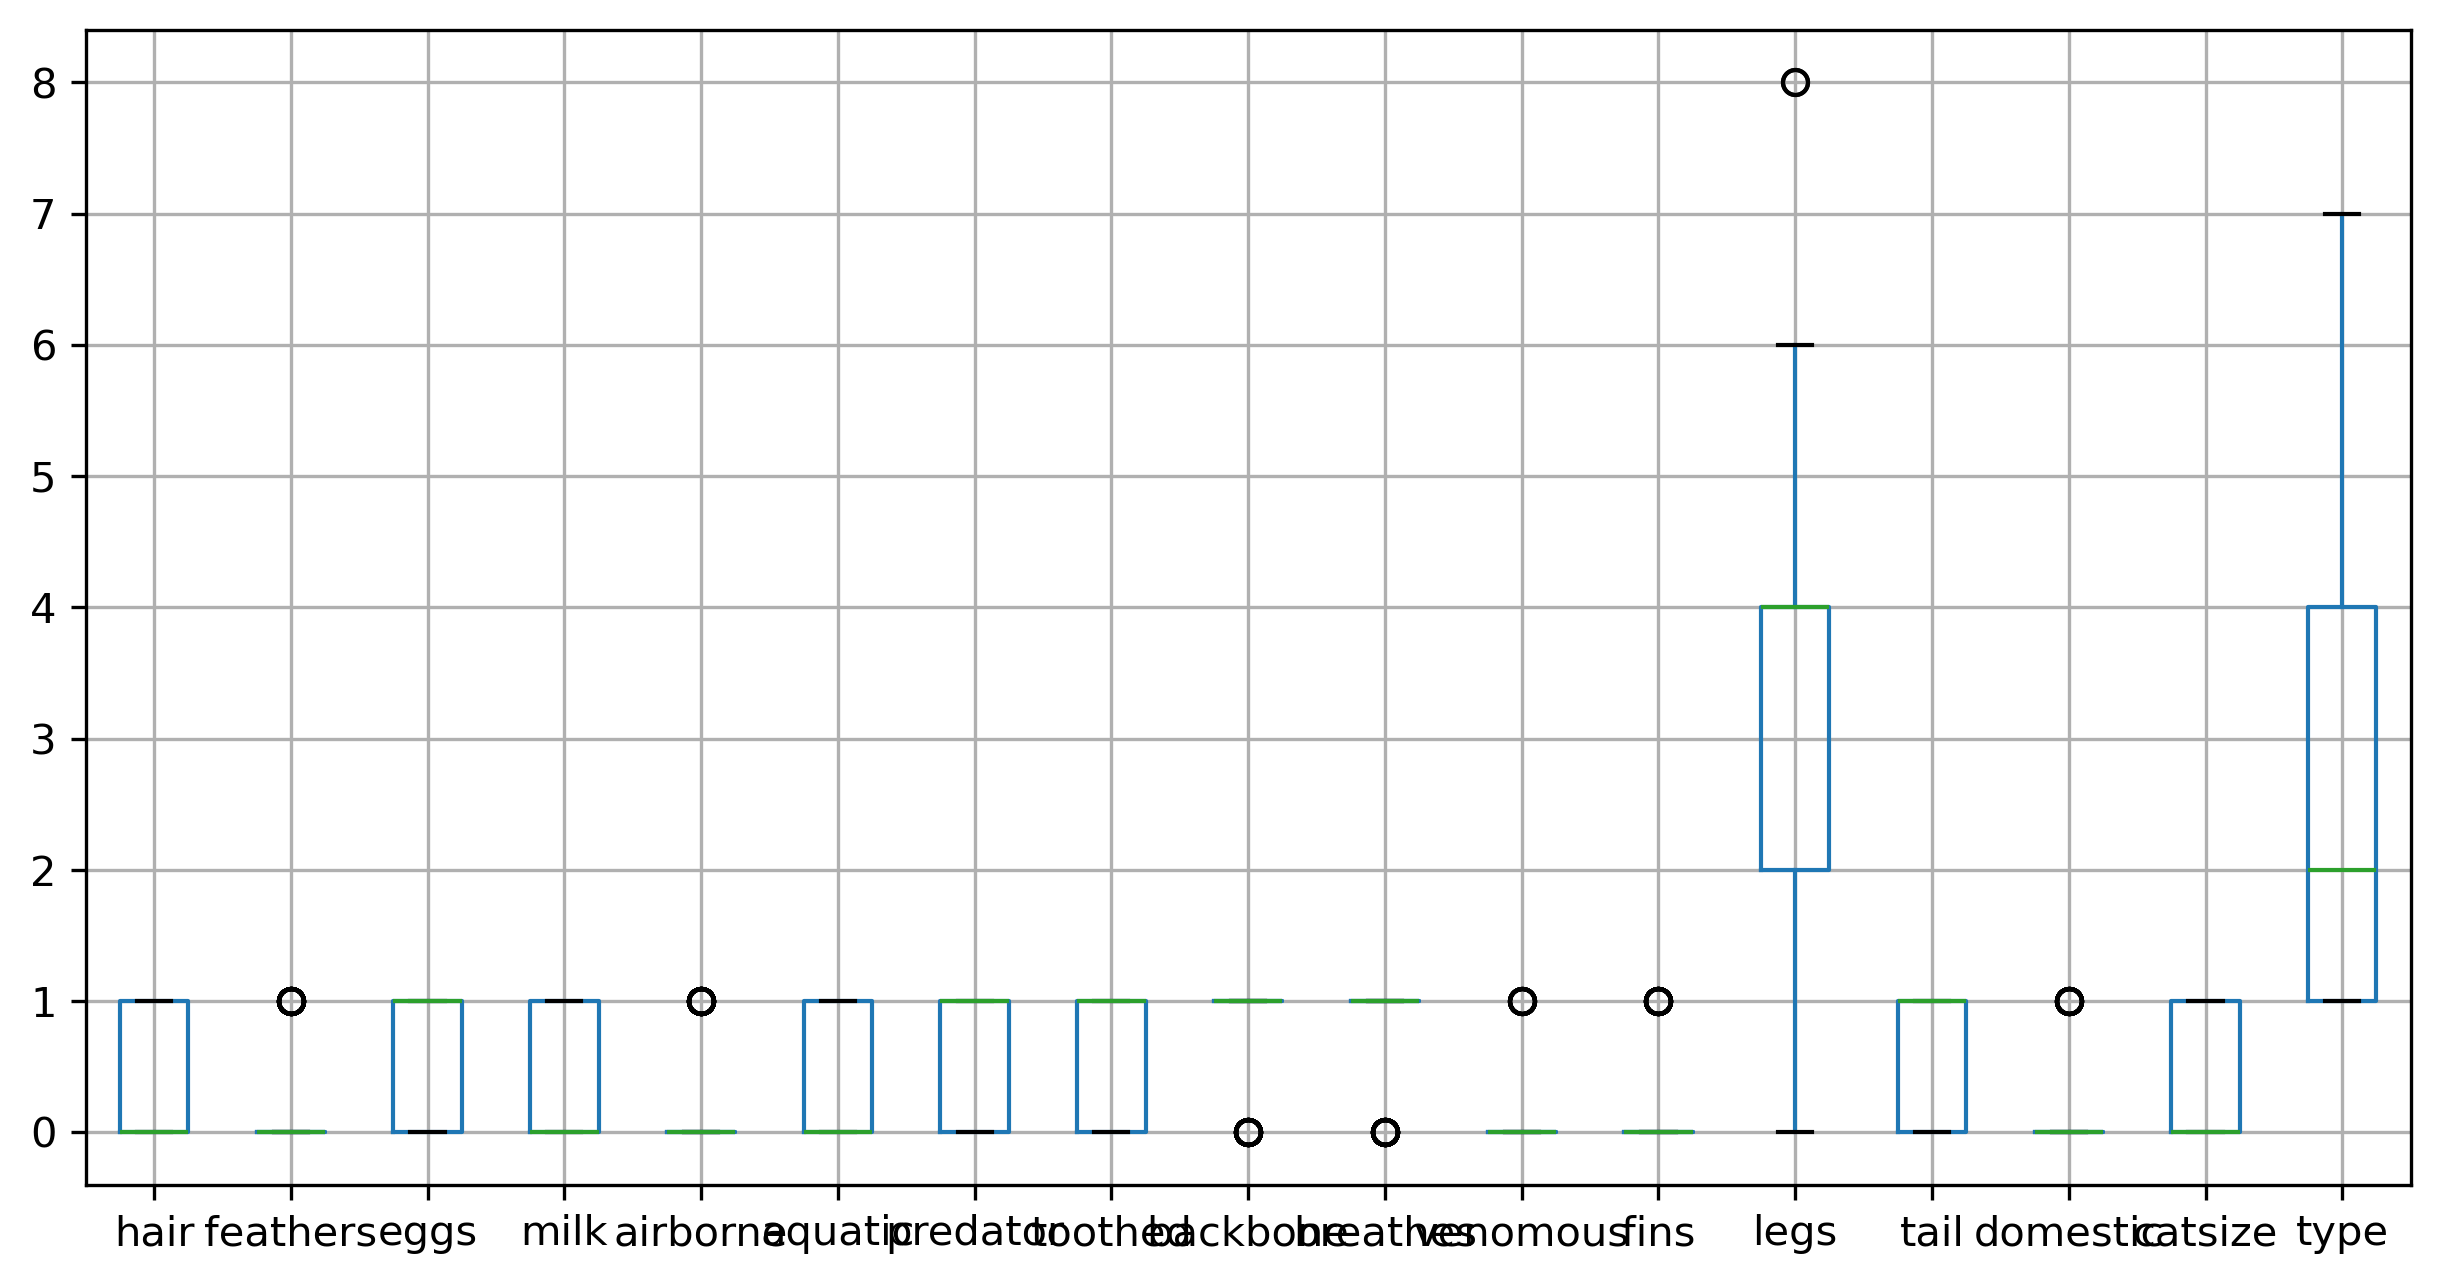

In [19]:
df.boxplot()

In [20]:
def outlier_replace(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

    return df

In [21]:
df = outlier_replace(df, 'feathers')
df = outlier_replace(df, 'airborne')
df = outlier_replace(df, 'backbone')
df = outlier_replace(df, 'breathes')
df = outlier_replace(df, 'venomous')
df = outlier_replace(df, 'fins')
df = outlier_replace(df, 'domestic')
df = outlier_replace(df, 'legs')


<Axes: >

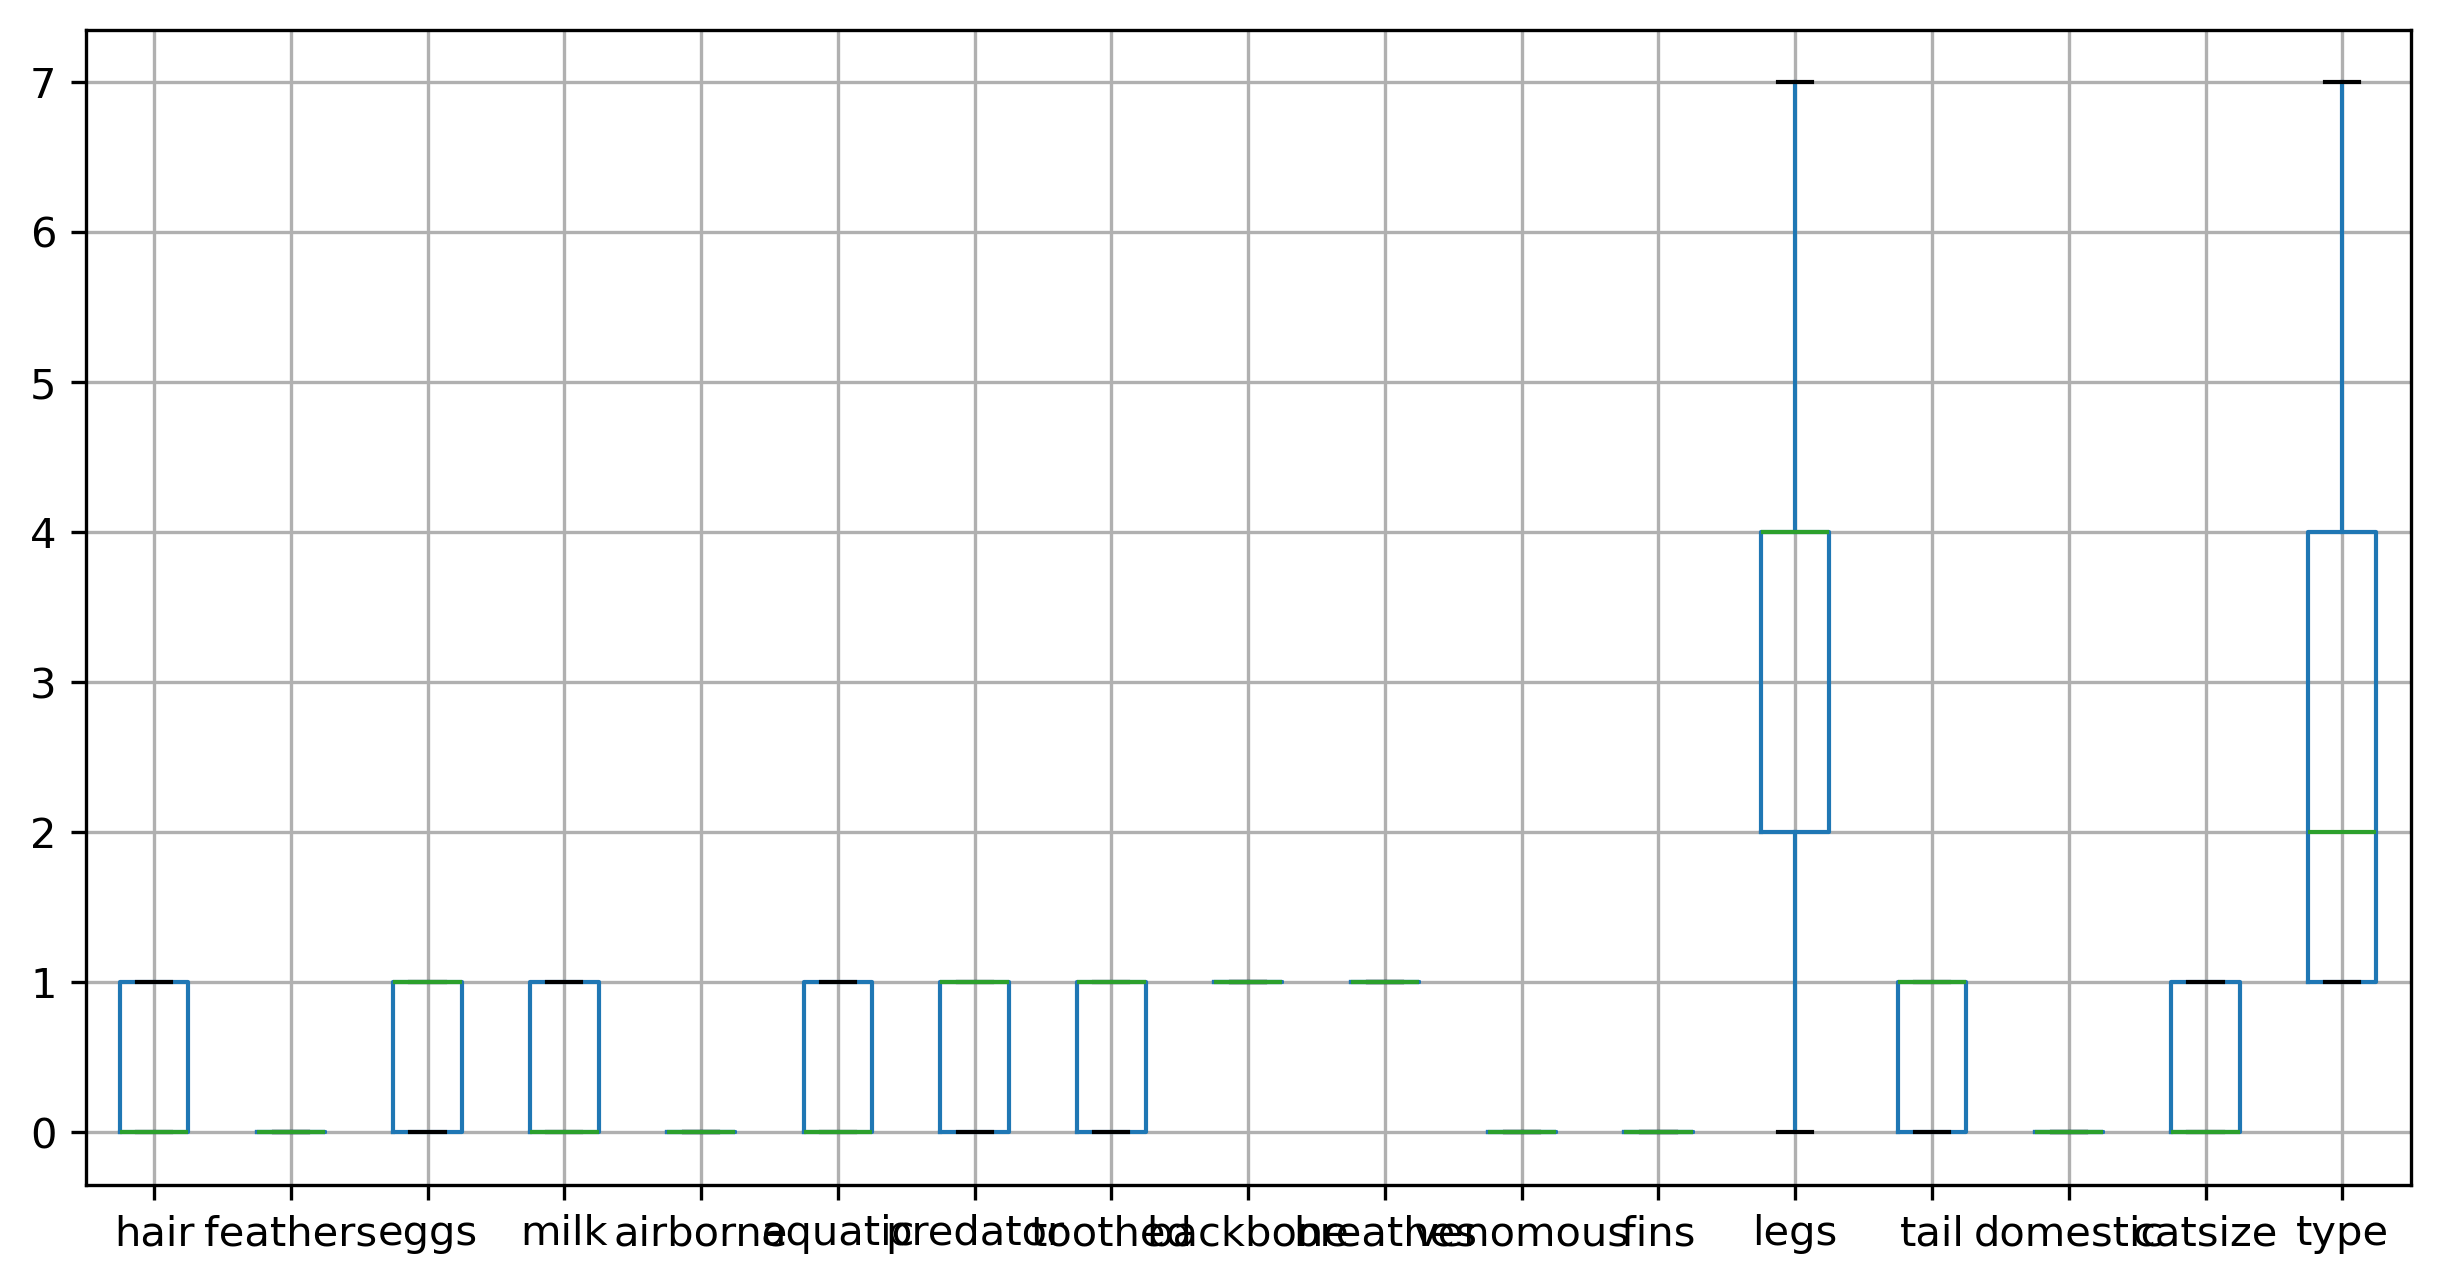

In [22]:
df.boxplot()

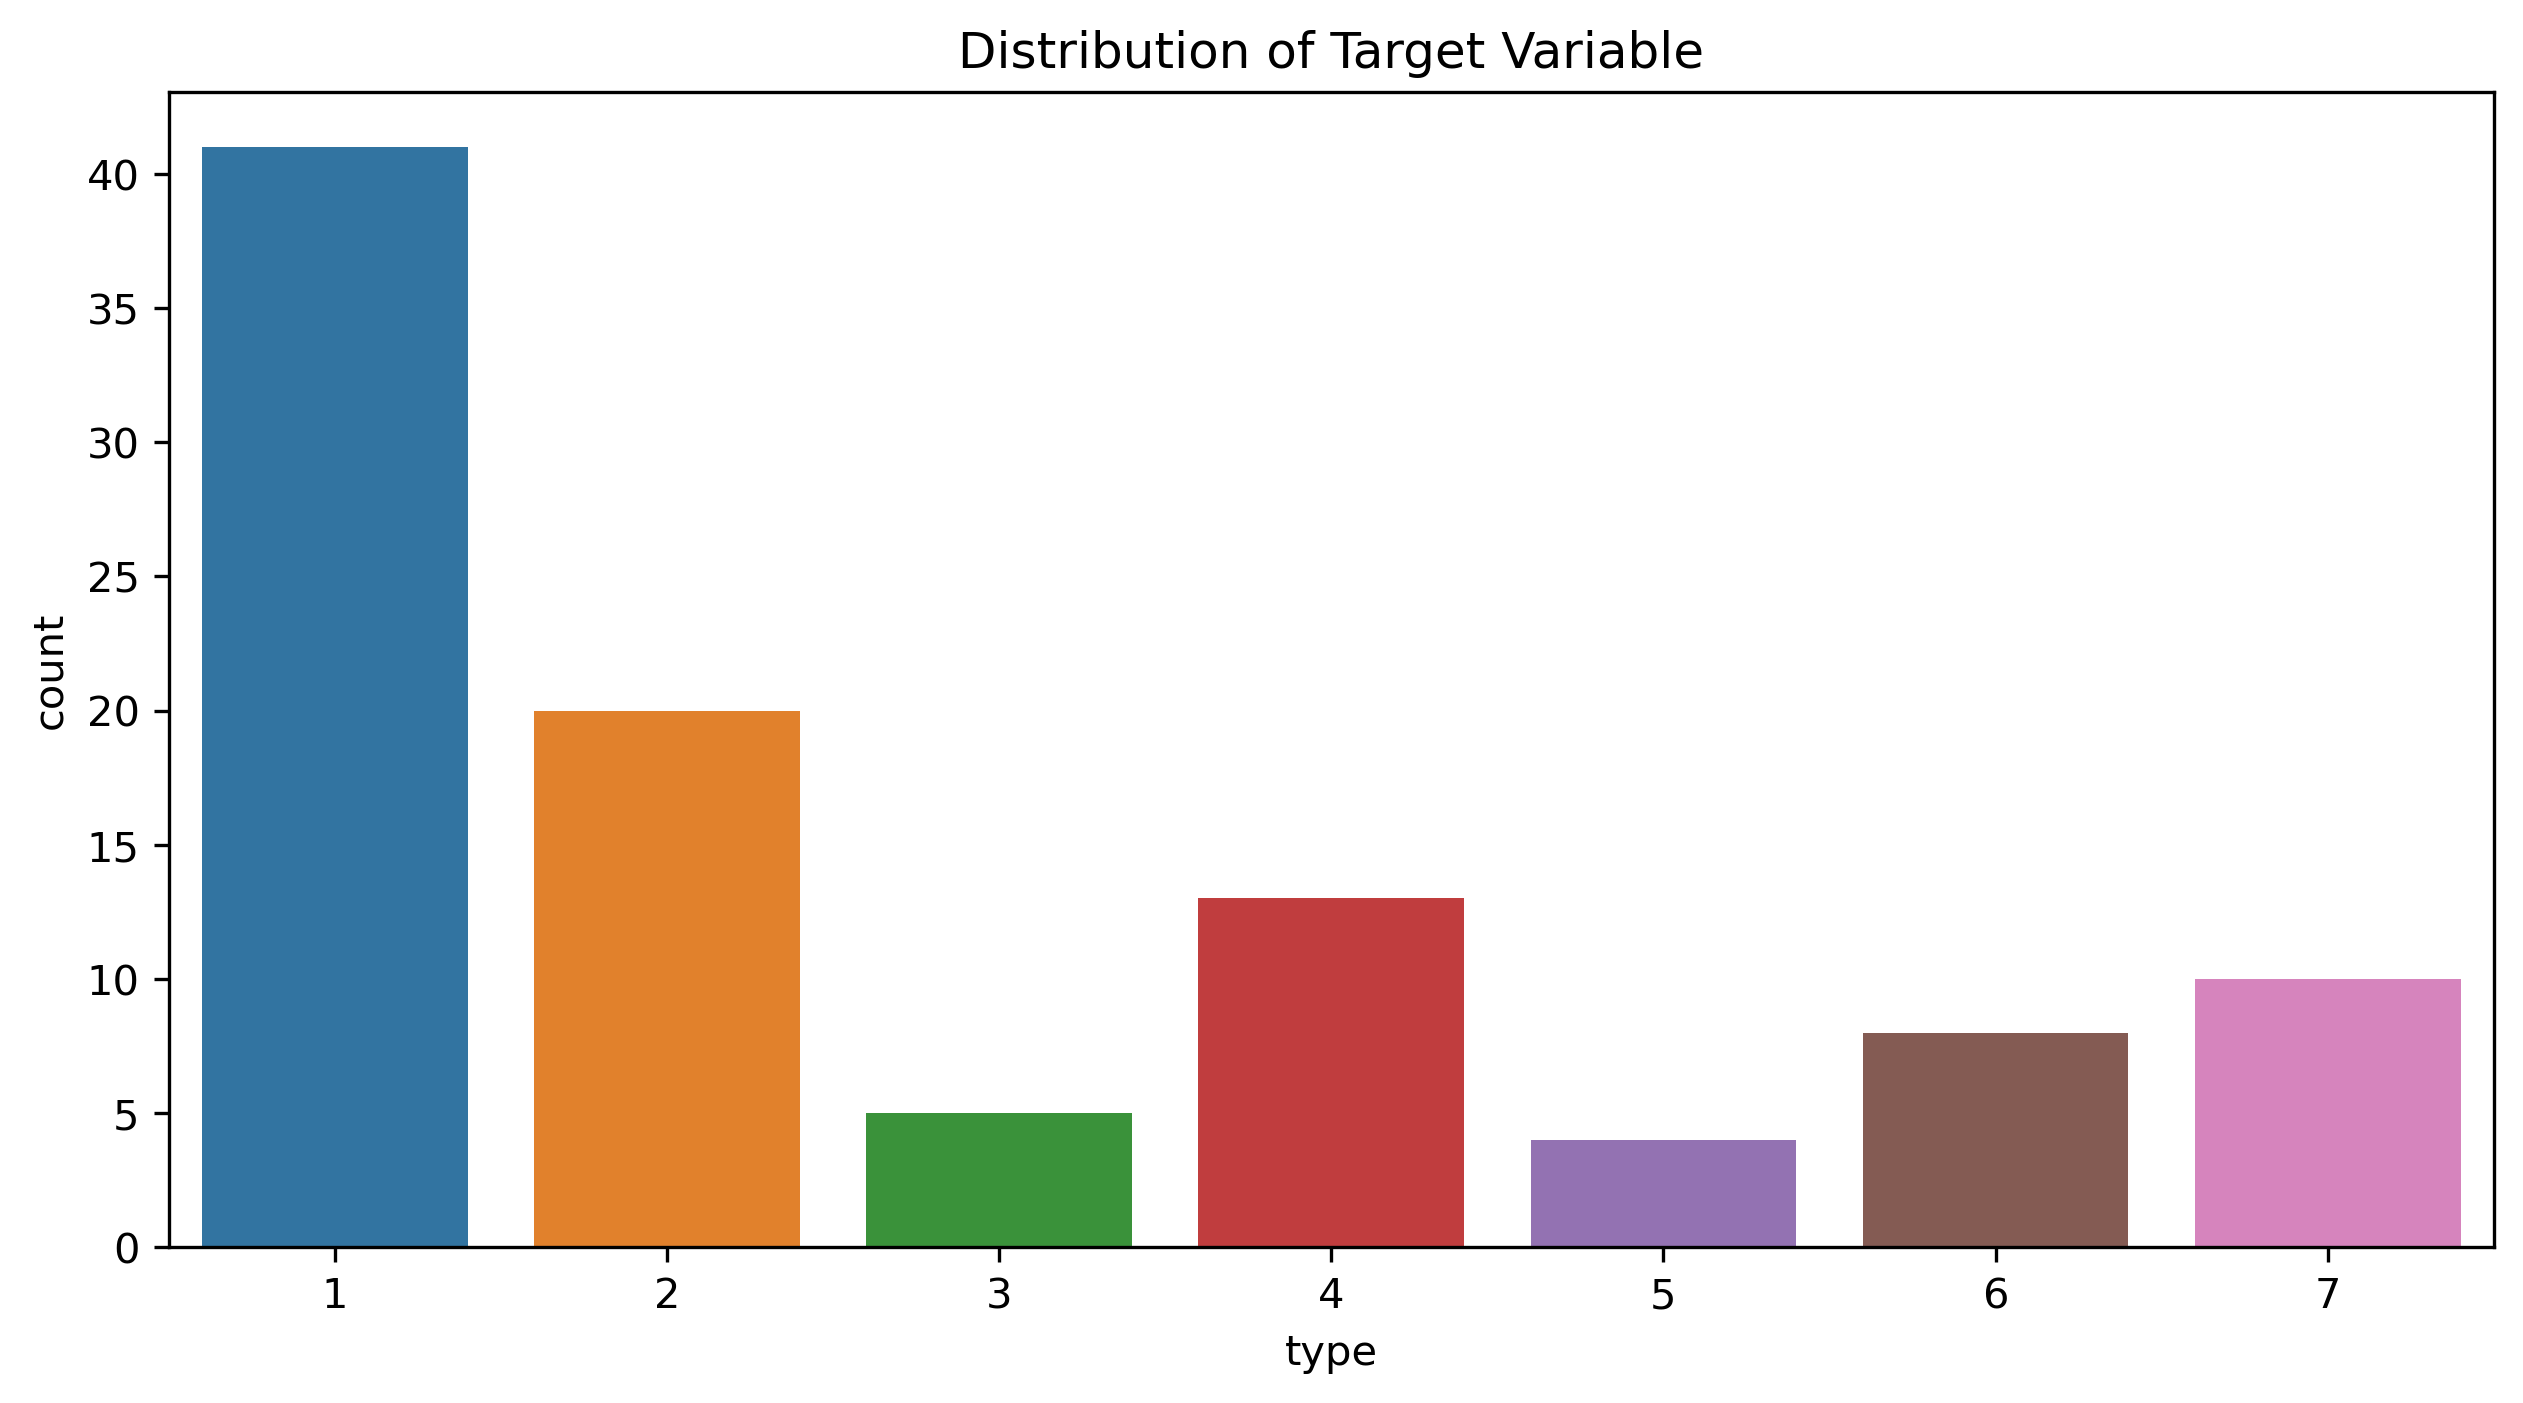

In [23]:
sns.countplot(x='type', data=df)
plt.title('Distribution of Target Variable')
plt.show()


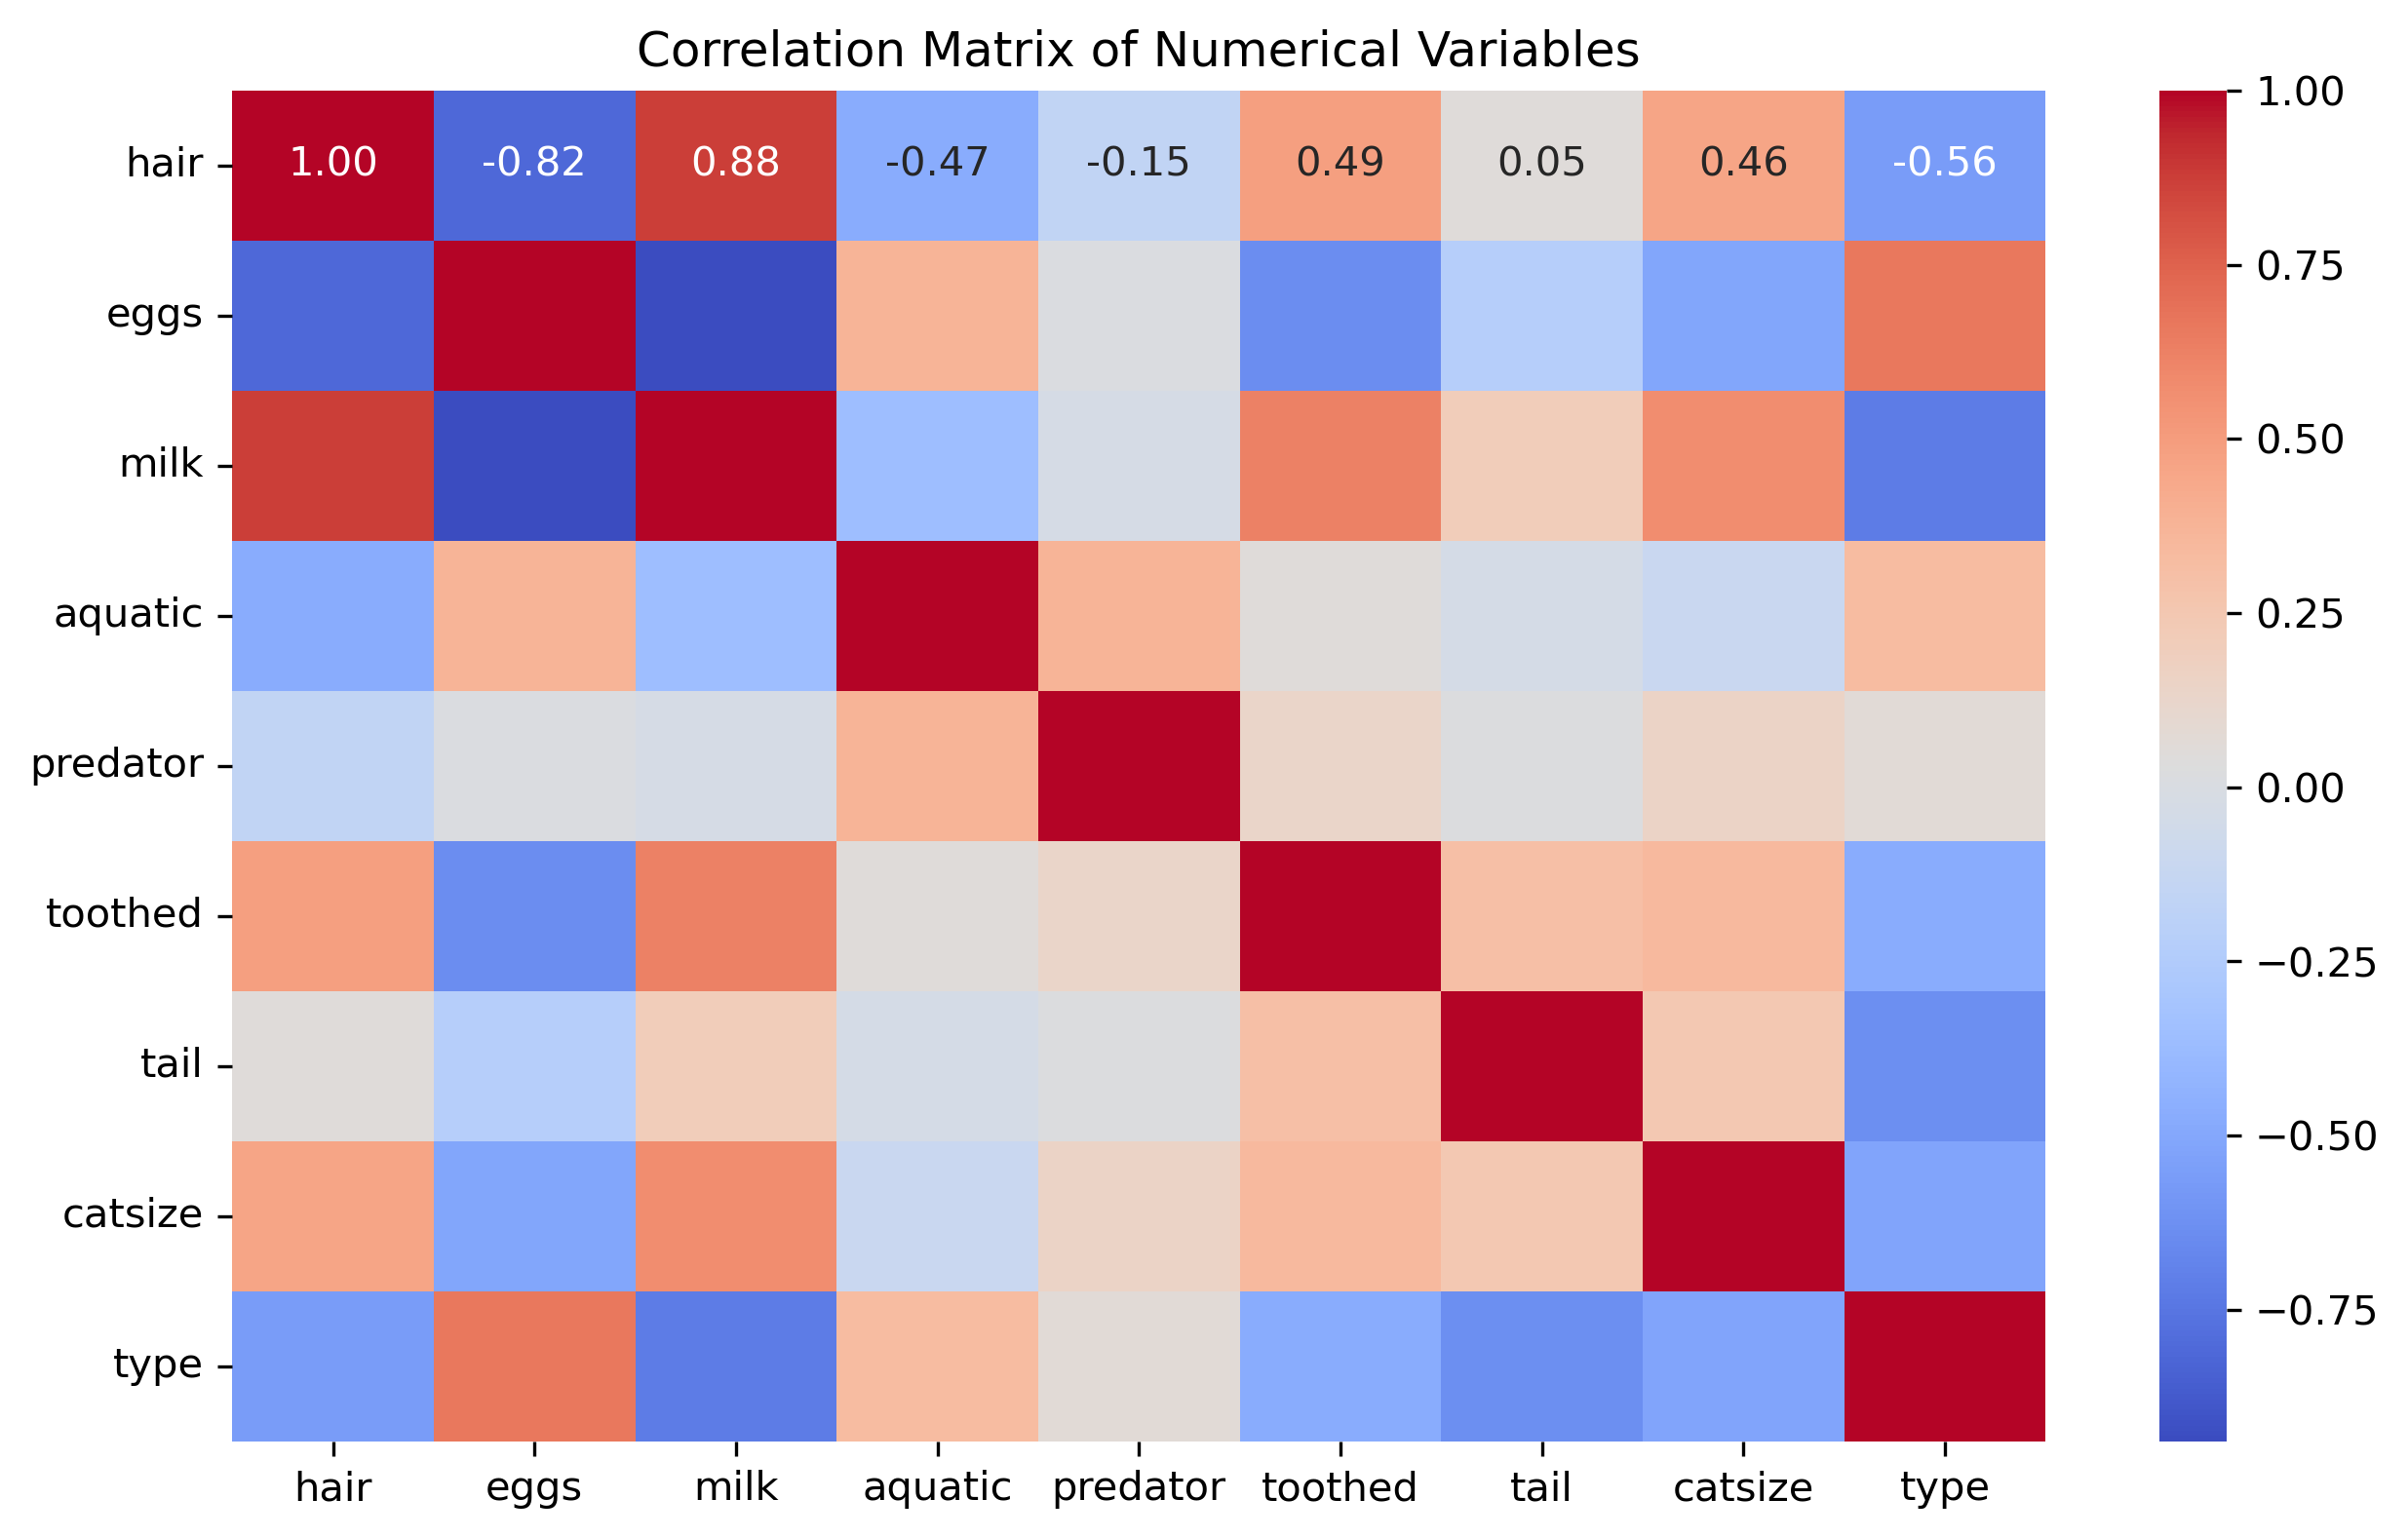

In [24]:
numerical_features = df.select_dtypes(int).columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

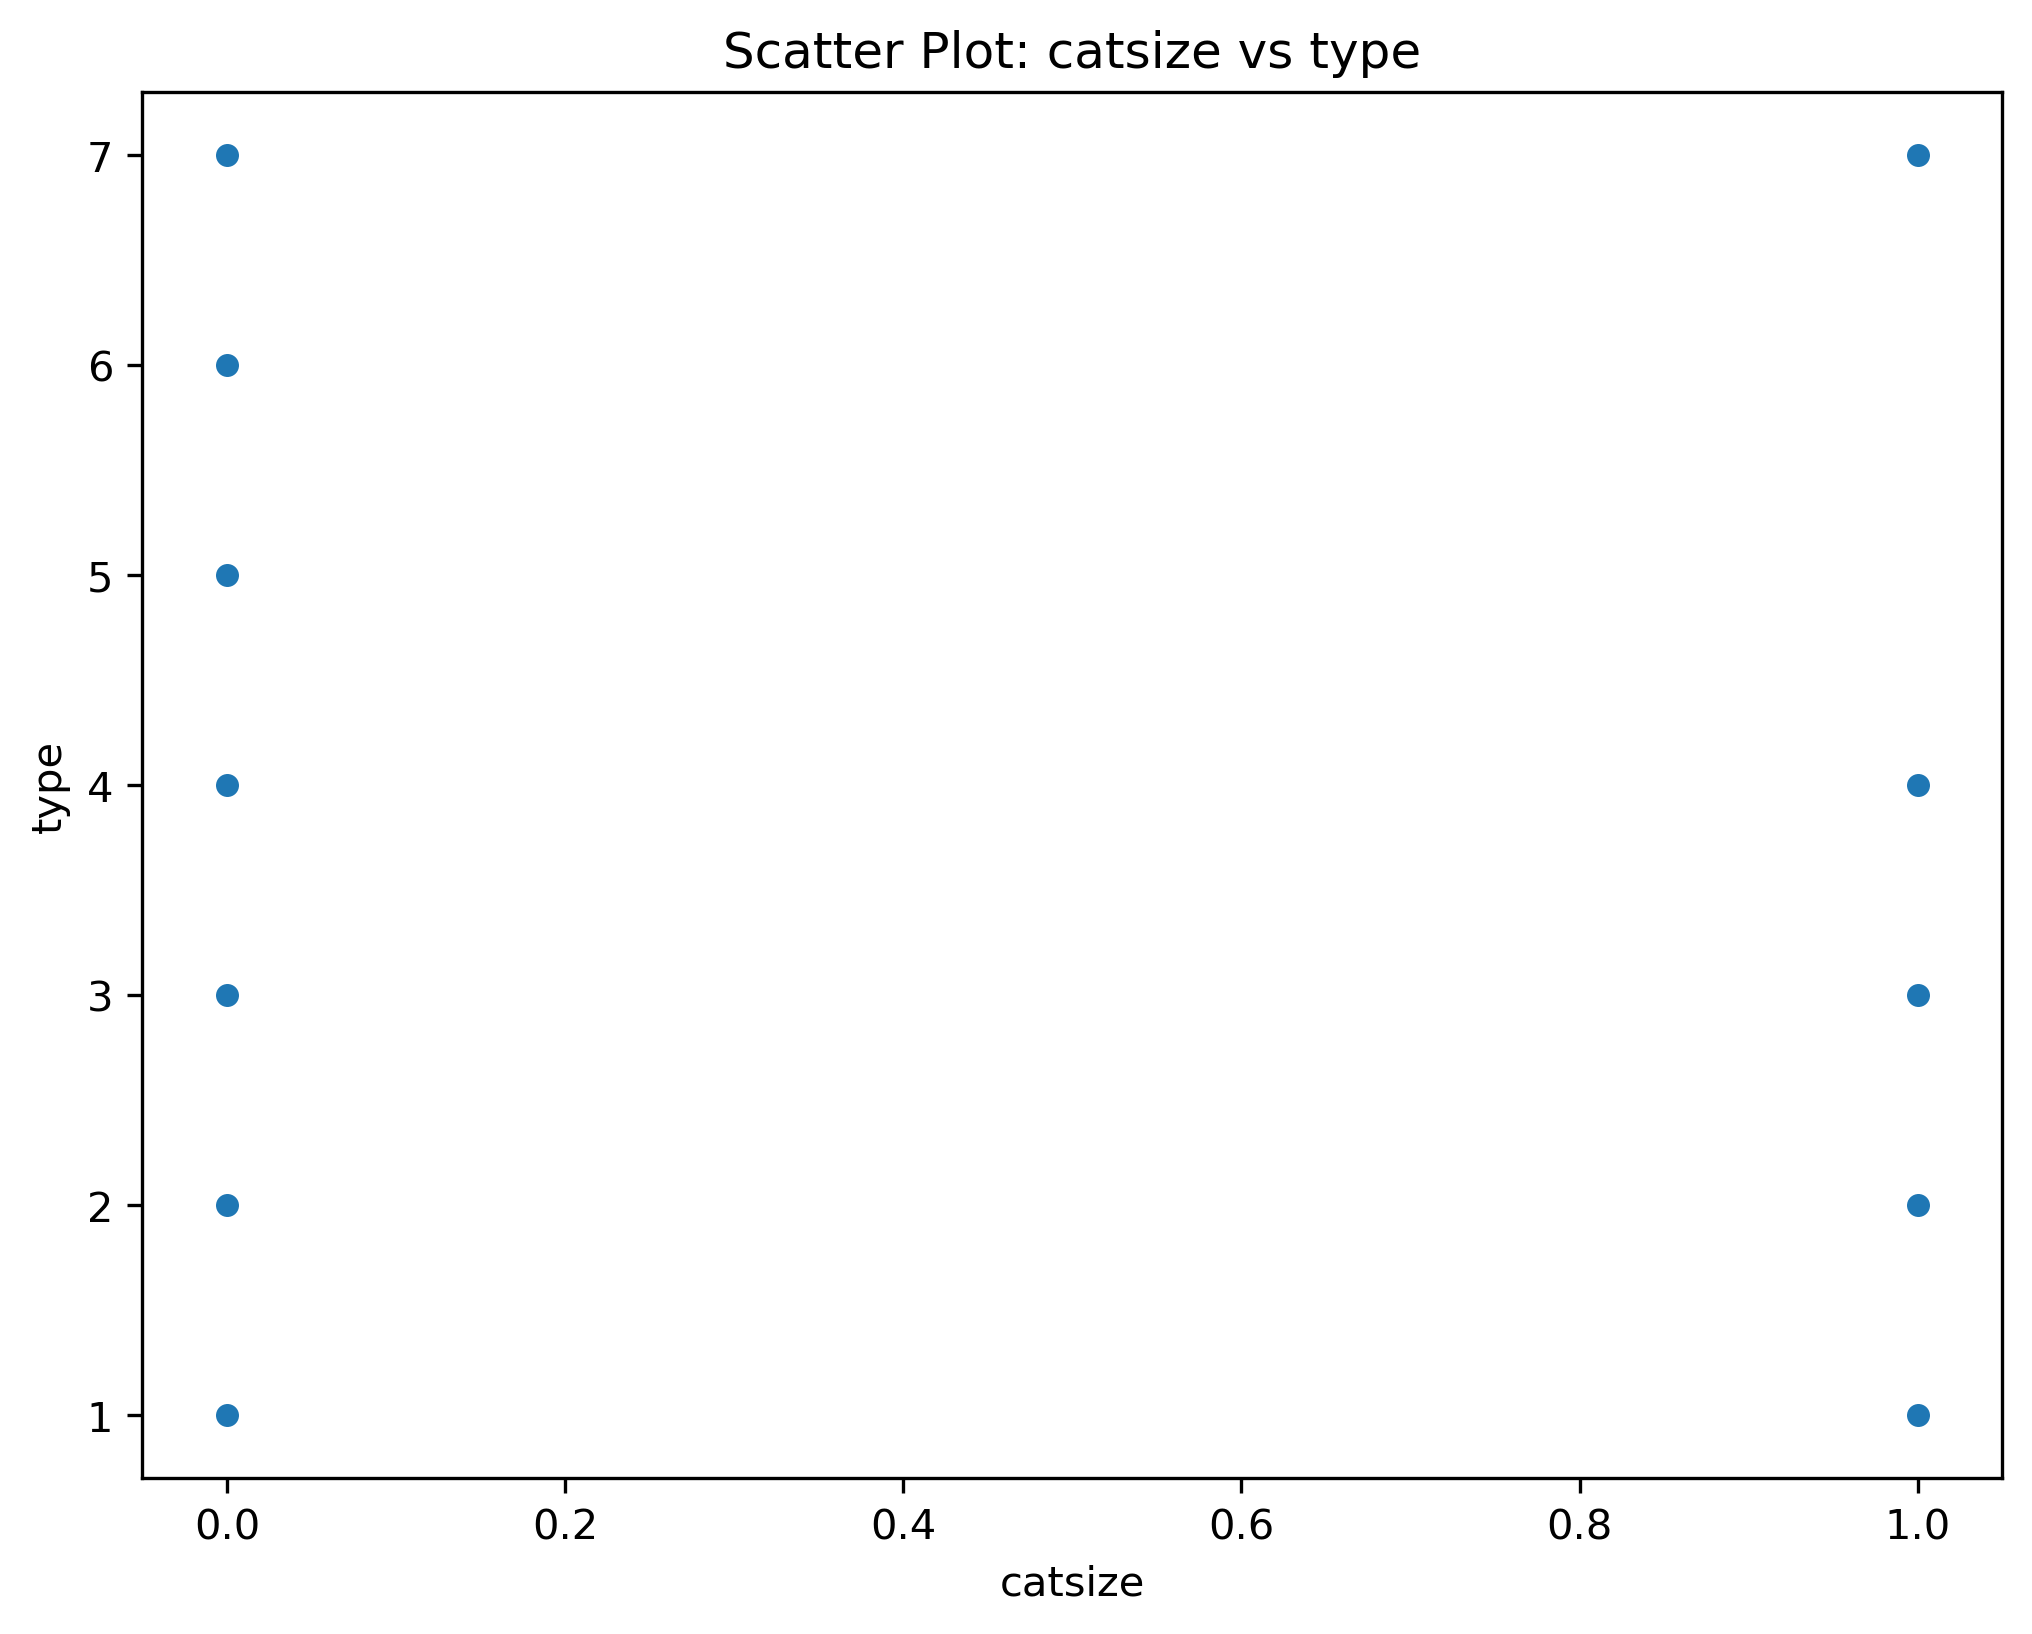

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='catsize', y='type', data=df)
plt.title('Scatter Plot: catsize vs type')
plt.xlabel('catsize')
plt.ylabel('type')
plt.show()

In [26]:
sns.pairplot(df)

In [27]:
X = df.iloc[:, 1:-1]
y = df['type']

In [28]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,0,0.0,1
1,1,0.0,0,1,0.0,0,0,1,1.0,1.0,0.0,0.0,4.0,1,0.0,1
2,0,0.0,1,0,0.0,1,1,1,1.0,1.0,0.0,0.0,0.0,1,0.0,0
3,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,0,0.0,1
4,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0.0,0,1,0.0,0,0,1,1.0,1.0,0.0,0.0,2.0,1,0.0,1
97,1,0.0,1,0,0.0,0,0,0,1.0,1.0,0.0,0.0,6.0,0,0.0,0
98,1,0.0,0,1,0.0,0,1,1,1.0,1.0,0.0,0.0,4.0,1,0.0,1
99,0,0.0,1,0,0.0,0,0,0,1.0,1.0,0.0,0.0,0.0,0,0.0,0


In [29]:
df['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc = StandardScaler()

In [32]:
X = sc.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
knn = KNeighborsClassifier()

In [35]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [36]:
ypred = knn.predict(X_test)

In [37]:
ypred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4],
      dtype=int64)

In [38]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.9625, 0.9523809523809523)

In [39]:
train_acc = []
test_acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_acc.append(knn.score(X_train,y_train))
    test_acc.append(knn.score(X_test,y_test))

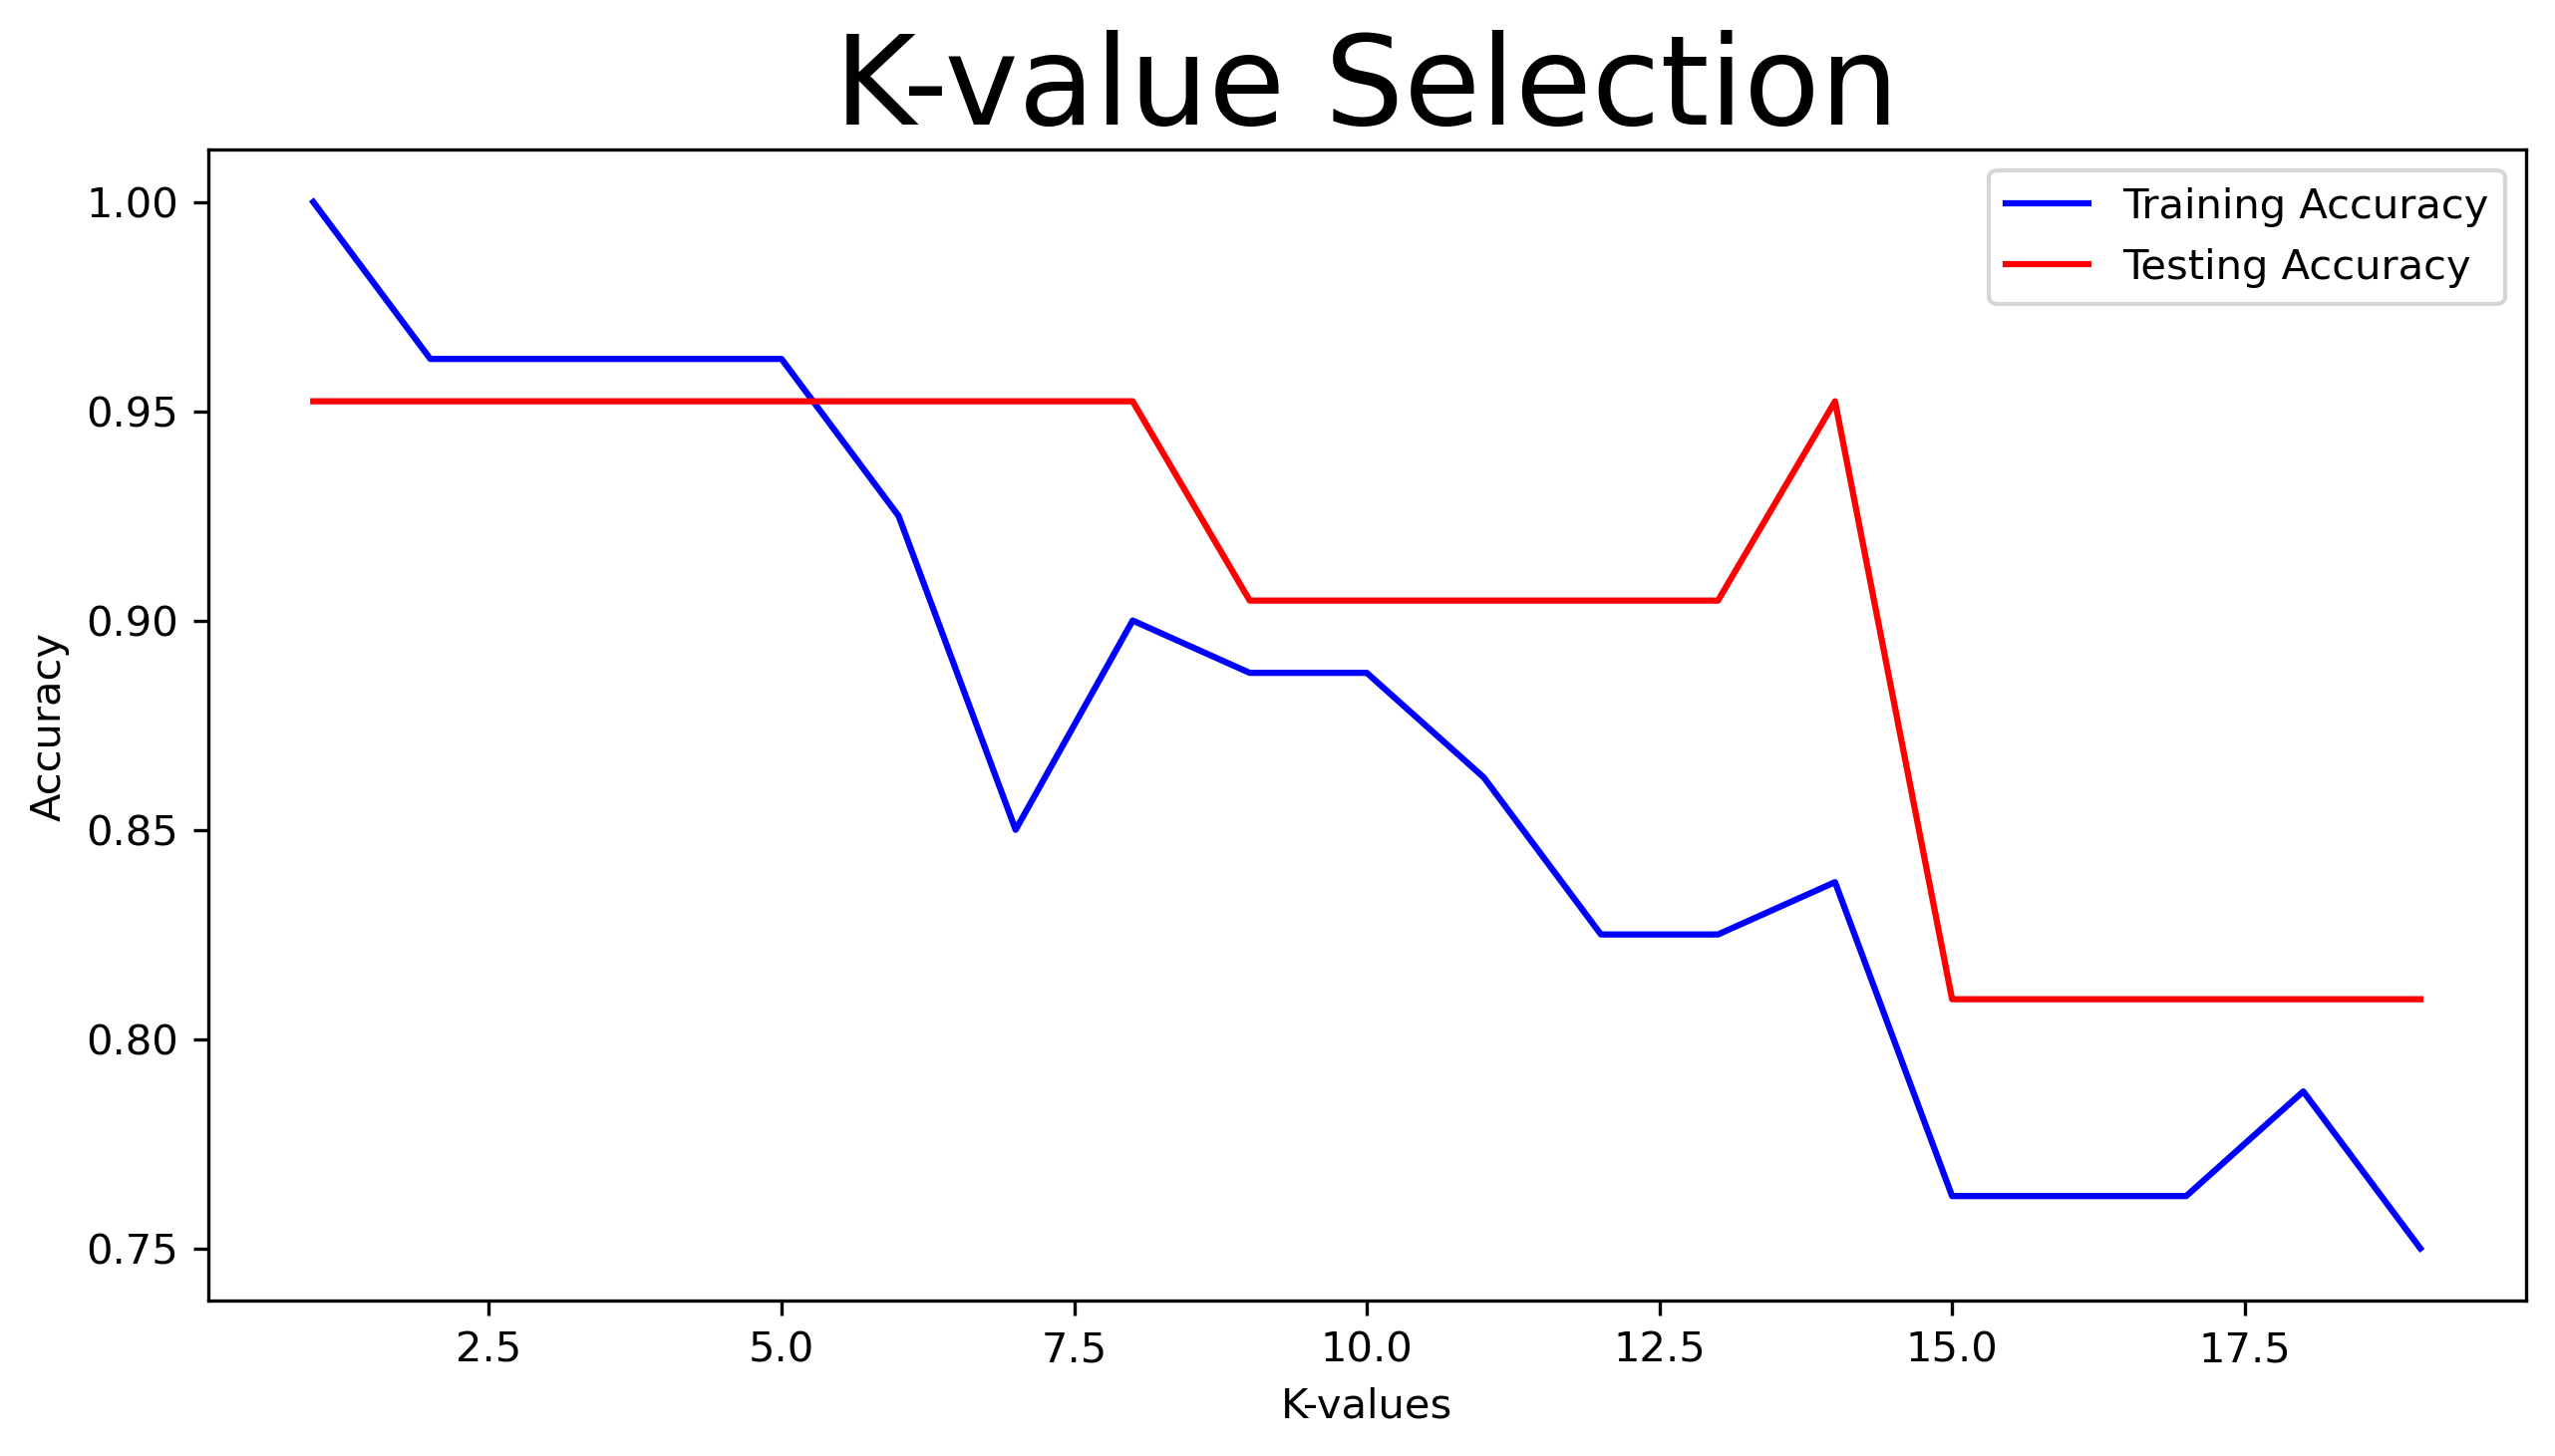

In [40]:
plt.plot(range(1,20), train_acc, color = 'blue', label = 'Training Accuracy')
plt.plot(range(1,20), test_acc, color = 'red', label = 'Testing Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-value Selection', size = 30)
plt.legend()

In [41]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
ypred = knn.predict(X_test)
print(f"Train: {knn.score(X_train,y_train)}\nTest: {knn.score(X_test,y_test)}")

Train: 0.925
Test: 0.9523809523809523
